# Factors of Carbon Emission Growth

With the rapid growth in industrialization and technology that our society is experiencing comes the increasing threat of environmental destruction due to climate change. As a young woman, I want to spend the rest of my life in a world devoid of frequent natural disasters and rapid decline in public health and success. In addition, I would like my children to grow up in the same world I did -- not one where it seems as though Mother Nature is against us. As a numbers oriented person, I see data analysis as a key startegy to mitigating the long term effects of climate change. 

For my project , I am using several different datasets from data.worldbank.org from the range 1970-2018 to evaluate the major factors of the rise of greenhouse gas emissions. To analyze the data, I chose to use Python; specifically, I used pandas, matplotlib, and sklearn to visualize and manipulate my data. 

In [1]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
# Read Files

files = ['emissions.csv', 'urbanpop.csv', 'electricpower.csv', 'forestarea.csv', 'fuelexports.csv', 'military.csv', 'ores.csv', 'energyuse.csv', 'renewableelec.csv', 'elecpower.csv', 'airtransport.csv', 'rails.csv']
data = []

for i in range(len(files)):
    data.append(pd.read_csv(files[i]))


In [3]:
cv = {}
factors = []
# Extract data from Files
for i in range(1970, 2018):
    header = str(i)
    for j in range(len(data[0][header])):
        cn = data[0]['Country Name'][j]
        if cn not in cv:
            cv[cn] = [[] for _ in range(len(data))]
            
        for k in range(len(data)):
            idx = data[k].index[data[k]['Country Name'] == cn][0]
            if data[k][header][idx] > 0 and data[k][header][idx] != None:
                # make sure that the val isnt nan
                cv[cn][k].append(data[k][header][idx])
            else:
                cv[cn][k].append(0)




In [4]:
sortedValues = []
weightsForAverage = []
for cn in cv.keys():
    value = cv[cn][0][-1]
    if value > 0:
        sortedValues.append((value, cn))
    weightsForAverage.append(value)
sv = sorted(sortedValues, reverse=True, key=lambda e: e[0])


    

In [5]:
for cn in cv.keys():
    for k in range(len(data)):
        newData = []
        for i in cv[cn][k]:
            if i == 0:
                newData.append(0)
            else:
                newData.append(i/max(cv[cn][k]))
        cv[cn][k] = newData


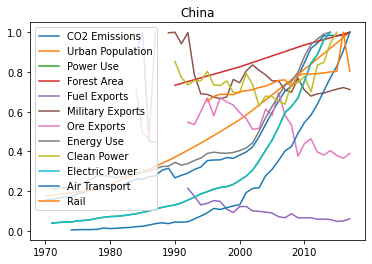

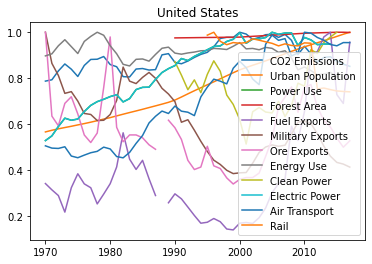

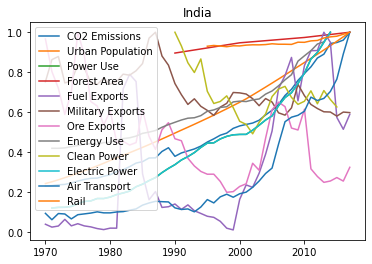

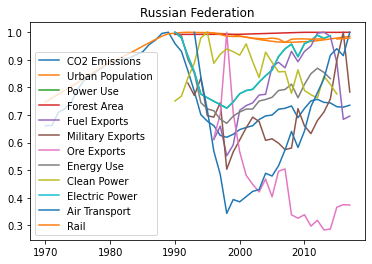

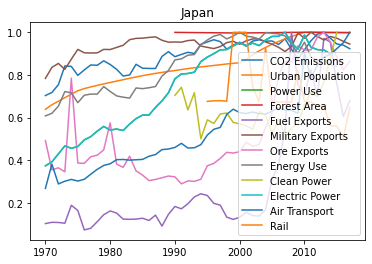

In [6]:
names = ['CO2 Emissions', 'Urban Population', 'Power Use', 'Forest Area', 'Fuel Exports', 'Military Exports', 'Ore Exports', 'Energy Use', 'Clean Power', 'Electric Power', 'Air Transport', 'Rail']

def graph(cv, cn):
    for k in range(len(data)):
        nonzeros = []
        for i in cv[cn][k]:
            if i == 0:
                nonzeros.append(None)
            else:
                nonzeros.append(i)
        plt.plot(list(range(1970, 2018)), nonzeros, label = names[k])
    plt.title(cn)
    
for i in range(5):
    graph(cv, sv[i][1])
    plt.legend()
    plt.show()


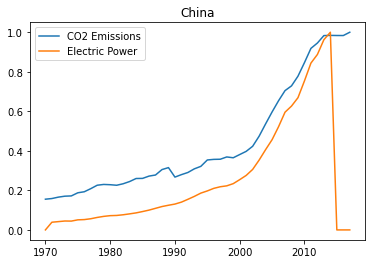

0


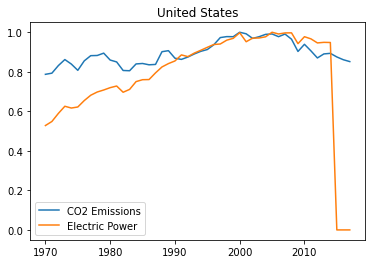

In [7]:
k = 9
plt.plot(list(range(1970, 2018)), cv['China'][0], label = names[0])
plt.plot(list(range(1970, 2018)), cv['China'][k], label = names[k])
plt.legend()
plt.title('China')
plt.show()
print(cv['United States'][k][-2])
plt.plot(list(range(1970, 2018)), cv['United States'][0], label = names[0])
plt.plot(list(range(1970, 2018)), cv['United States'][k], label = names[k])
plt.legend()
plt.title('United States')
plt.show()

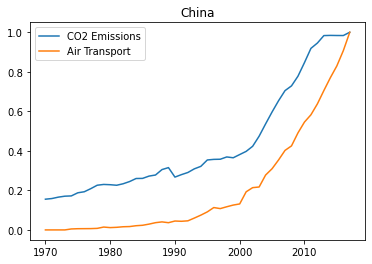

0.9549680902710467


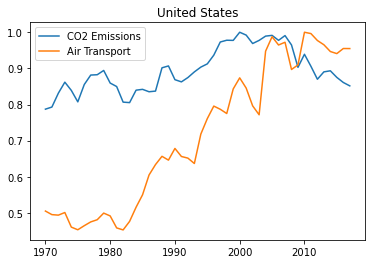

In [8]:
k = 10
plt.plot(list(range(1970, 2018)), cv['China'][0], label = names[0])
plt.plot(list(range(1970, 2018)), cv['China'][k], label = names[k])
plt.legend()
plt.title('China')
plt.show()
print(cv['United States'][k][-2])
plt.plot(list(range(1970, 2018)), cv['United States'][0], label = names[0])
plt.plot(list(range(1970, 2018)), cv['United States'][k], label = names[k])
plt.legend()
plt.title('United States')
plt.show()

###### 

In [9]:
from scipy.stats import pearsonr

# Construct the columns for the different powers of x
def pr(x, y):
    return pearsonr(x, y)[0]


def weighted_average(distribution, weights):
    return round(sum([distribution[i]*weights[i] for i in range(len(distribution))])/sum(weights),2)


# Make list for the rsquare of emissions and each datapoint

rsquares = []
for i in range(len(files)-2):
    rsquares.append([])


# Loop through each country, find each rsquare, and append those to its list
for cn in cv.keys():
    rsquared = []
    for i in range(2, len(cv[cn])):
        rsquared.append(pearsonr(cv[cn][0], cv[cn][i])[0])
    for i in range(len(rsquares)):
        if not np.isnan(rsquared[i]):
            rsquares[i].append(rsquared[i])

    

# Find the average of each of those lists

avg = []
for i in range(len(rsquares)):
    avg.append(sum(rsquares[i])/len(rsquares[i]))

#accesselec.csv, timeforelec.csv
for i in range(len(files)-2):
    if sorted(avg, reverse=True)[5] == avg[i]:
        print('MAXIMUM:', end=' ')
    print(files[i+2] + ' ' + str(avg[i]))

c:\users\venya\appdata\local\programs\python\python38\lib\site-packages\scipy\stats\stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


electricpower.csv 0.26075927131924603
forestarea.csv 0.2058891071539017
MAXIMUM: fuelexports.csv 0.060908965339851844
military.csv -0.08323066200081344
ores.csv 0.043014317239011085
energyuse.csv 0.18382852445531403
renewableelec.csv 0.0523703105218393
elecpower.csv 0.26075927131924603
airtransport.csv 0.23417800615617787
rails.csv 0.04359194129421221


Germany Vietnam


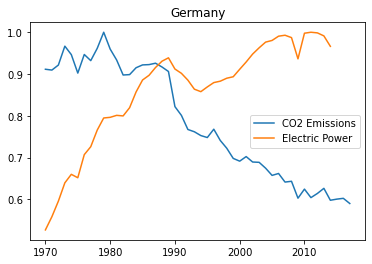

0


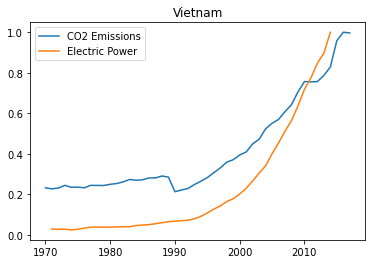

Pakistan Equatorial Guinea


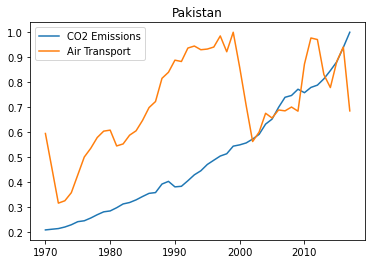

1.0


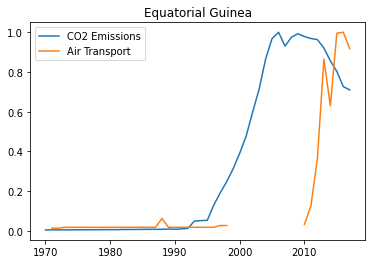

In [10]:


def zero_to_nan(values):
    return [float('nan') if x==0 else x for x in values]

def highlow(k):
    avgs1 = []
    avgs2 = []
    cnnz = []
    for cn in cv.keys():
        nonzeros = []
        for v in cv[cn][k]:
            if v != 0:
                nonzeros.append(v)
        if len(nonzeros) == 0:
            continue
        cnnz.append(cn)    
        avgs1.append(sum(nonzeros)/len(nonzeros))
        avgs2.append(sum(cv[cn][k])/len(cv[cn][k]))

    maxi = avgs2.index(max(avgs2))
    mini = avgs1.index(min(avgs1))
    print(cnnz[maxi], cnnz[mini])

    plt.plot(list(range(1970, 2018)), zero_to_nan(cv[cnnz[maxi]][0]), label = names[0])
    plt.plot(list(range(1970, 2018)), zero_to_nan(cv[cnnz[maxi]][k]), label = names[k])
    plt.legend()
    plt.title(cnnz[maxi])
    plt.show()
    print(cv[cnnz[mini]][k][-2])
    plt.plot(list(range(1970, 2018)), zero_to_nan(cv[cnnz[mini]][0]), label = names[0])
    plt.plot(list(range(1970, 2018)), zero_to_nan(cv[cnnz[mini]][k]), label = names[k])
    plt.legend()
    plt.title(cnnz[mini])
    plt.show()

    
highlow(9)

highlow(10)

In [11]:
# make function that will do linear regression with any of factors^

def linreg(factor):
    ypreds = []
    for i in range(5):
        cn = sv[i][1] 
        factor_data = cv[cn][files.index(factor)] #line b
        carbs = cv[cn][0]
        x = np.array(factor_data).reshape((-1, 1))
        y = np.array(carbs)
        model = LinearRegression()
        model.fit(x, y)
        y_pred = model.predict(np.array([0]).reshape((-1, 1)))
        ypreds.append(y_pred[0])
    return ypreds

emissionsFuture = linreg('elecpower.csv')


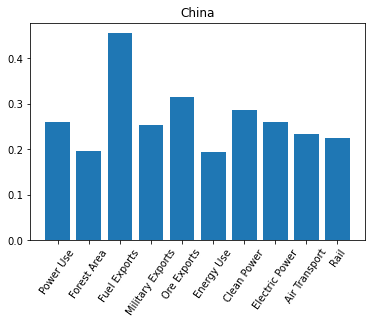

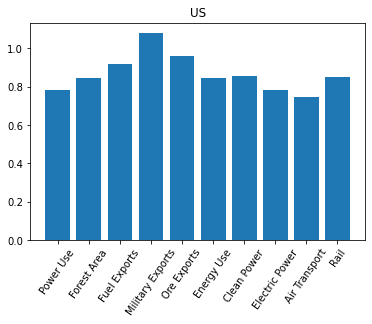

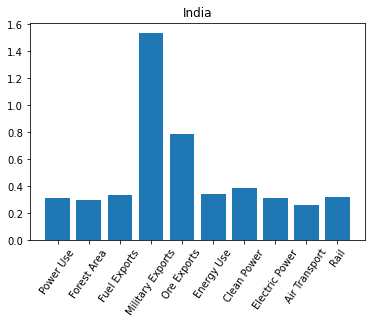

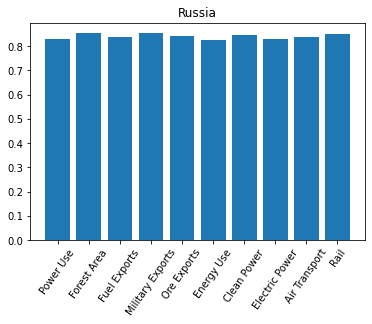

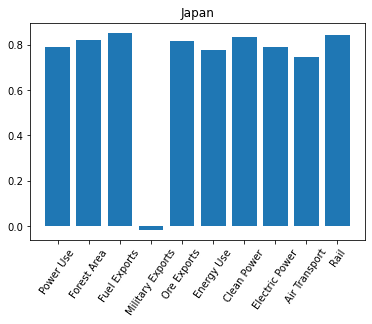

In [12]:
#GRAPHING :DDDDDD

def graph_pred(pred):
    plt.bar(names[2:], pred)
    plt.xticks(rotation = 55)

predval = [[],[],[],[],[]]


for i in range(len(files)-2):
    pred = linreg(files[i+2])
    predval[0].append(pred[0])
    predval[1].append(pred[1])
    predval[2].append(pred[2])
    predval[3].append(pred[3])
    predval[4].append(pred[4])

graph_pred(predval[0])
plt.title('China')
plt.show()
graph_pred(predval[1])
plt.title('US')
plt.show()
graph_pred(predval[2])
plt.title('India')
plt.show()
graph_pred(predval[3])
plt.title('Russia')
plt.show()
graph_pred(predval[4])
plt.title('Japan')
plt.show()

In [13]:
# make function that will do linear regression with any of factors^

def linreg2(factors):
    ypreds = []
    for i in range(5):
        cn = sv[i][1] 
        factor_data = []
        for factor in factors:
            factor_data.append(cv[cn][files.index(factor)]) #line b
        carbs = cv[cn][0]
        x = np.array(factor_data).T#.reshape((-1, 1))
        y = np.array(carbs)
        model = LinearRegression()
        model.fit(x, y)
        latest_values = [data[-1] for data in factor_data]
        predictions = []
        for j in range(len(factors)):
            inp = np.array(latest_values)
            inp[j] = 0
            predictions.append(model.predict([inp])[0])
        ypreds.append(predictions)
    return ypreds


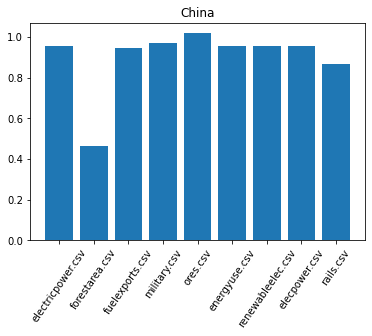

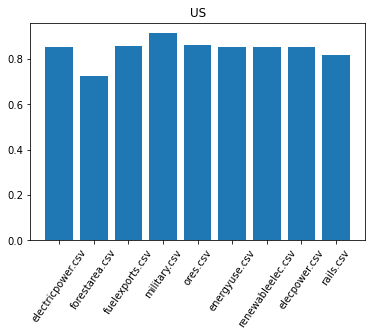

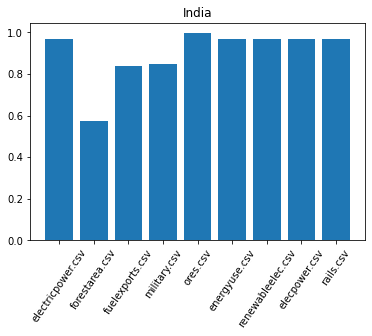

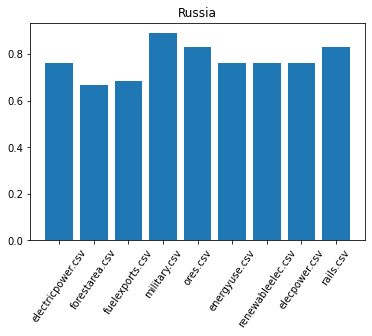

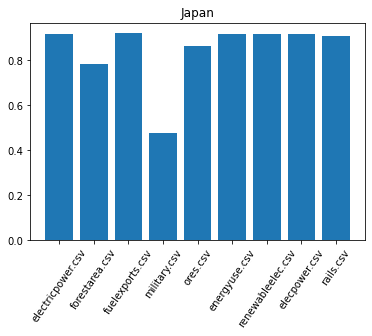

In [35]:
#GRAPHING :DDDDDD
filesss = files[2:]
del filesss[8]
def graph_pred(pred):
    plt.bar(filesss, pred)
    plt.xticks(rotation = 55)

predval = [[],[],[],[],[]]


predval = linreg2(filesss)

graph_pred(predval[0])
plt.title('China')
plt.show()
graph_pred(predval[1])
plt.title('US')
plt.show()
graph_pred(predval[2])
plt.title('India')
plt.show()
graph_pred(predval[3])
plt.title('Russia')
plt.show()
graph_pred(predval[4])
plt.title('Japan')
plt.show()